### Preparing Scraping Environment

In [1]:
pip install selenium

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install time

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement time
ERROR: No matching distribution found for time


In [3]:
pip install requests

Note: you may need to restart the kernel to use updated packages.


###  Importing Libraries

In [25]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
import time, urllib.request
import requests
import warnings
warnings.filterwarnings('ignore')

In [5]:
PATH = r"C:\Users\Purnanand\OneDrive\Desktop\Data Science\My Projects\SocialMedia Scraper\chromedriver.exer"

In [6]:
driver = webdriver.Chrome(PATH)

<ipython-input-6-953d381b69ca>:1: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(PATH)


### Get Instagram Website

In [7]:
driver.get("https://www.instagram.com/")

### Log in to Instagram account 

In [8]:
#logging in
time.sleep(5)

#username
username = driver.find_element(By.CSS_SELECTOR, "input[name='username']")
#username=driver.find_element_by_css_selector("input[name='username']")

#password
password = driver.find_element(By.CSS_SELECTOR, "input[name='password']")
#password=driver.find_element_by_css_selector("input[name='password']")

username.clear()
password.clear()

username.send_keys("testingxmyxfeed")
password.send_keys("Puku2872000")

#Login
login = driver.find_element(By.CSS_SELECTOR, "button[type='submit']").click()

"Save info ?" block pops up. So to answer it, we will click "Not Now".

In [9]:
#Save your login info ?
time.sleep(10)

notnow = driver.find_element(By.XPATH, "//button[contains(text(), 'Not Now')]").click()

"Turn on notification ?" block pops up. So to answer it, we will click "Not Now".

In [10]:
#turn on notification
time.sleep(10)

notnow2 = driver.find_element(By.XPATH, "//button[contains(text(), 'Not Now')]").click()

In [11]:
# POST LINK
# https://www.instagram.com/p/CZKwuaSB6Rz/

In [12]:
#Search Box
time.sleep(5)

driver.find_element(By.CSS_SELECTOR, "svg[aria-label='Search']").click()
searchbox = driver.find_element(By.CSS_SELECTOR, "input[placeholder='Search']")

In [13]:
searchbox.clear()
searchbox.send_keys("teslamotors")
time.sleep(5)
searchbox.send_keys(Keys.ENTER)

In [14]:
time.sleep(5)
searchbox.send_keys(Keys.ENTER)

In [15]:
post_url = "https://www.instagram.com/p/CZKwuaSB6Rz/"

In [16]:
stripped_url = post_url.replace("https://www.instagram.com","")

In [17]:
stripped_url

'/p/CZKwuaSB6Rz/'

In [18]:
time.sleep(5)
driver.find_element(By.CSS_SELECTOR, f"a[href='{stripped_url}']").click()

In [19]:
#_aacl _aaco _aacu _aacx _aad7 _aade

In [54]:
#xyz = driver.find_element(By.CLASS_NAME, "span[class='_aacl _aaco _aacu _aacx _aad7 _aade']")
comments = driver.find_elements(By.XPATH, "//span[contains(@class,'_aacl _aaco _aacu _aacx _aad7 _aade')]")

In [55]:
post_comments = []
for comment in comments :
    post_comments.append(comment.text)
    comments = driver.find_elements(By.XPATH, "//span[contains(@class,'_aacl _aaco _aacu _aacx _aad7 _aade')]")
    try : 
        driver.find_element(By.CSS_SELECTOR, "svg[aria-label='Load more comments']").click()
    except:
        pass

In [56]:
len(post_comments)

3789

In [146]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [57]:
comments_df = pd.DataFrame(post_comments, columns=['Comments'])
comments_df.head()

,Comments
0,my mother died today and im so down..my sister...
1,Wow.
2,Selling an extra #Teslacharger an connecter dm...
3,@jadin.rodgers
4,@elijah._.veloza


In [72]:
comments_df.head(10)

,Comments
0,my mother died today and im so down..my sister...
1,Wow.
2,Selling an extra #Teslacharger an connecter dm...
3,@jadin.rodgers
4,@elijah._.veloza
5,@elijah._.veloza
6,Ready for next Corona invasion - nice Tesla!
7,👏👏👏
8,@notjonybones follow me
9,Incredible !! 👏❤️🔥


In [86]:
driver.find_elements(By.XPATH, "//span")

[<selenium.webdriver.remote.webelement.WebElement (session="a120fb7e57d1e0bc64c58e1f02deb39e", element="89645877-0b0b-4356-baa0-065fcc7628e5")>,
 <selenium.webdriver.remote.webelement.WebElement (session="a120fb7e57d1e0bc64c58e1f02deb39e", element="ed3cae2f-8235-497a-b64c-6c0219c59656")>,
 <selenium.webdriver.remote.webelement.WebElement (session="a120fb7e57d1e0bc64c58e1f02deb39e", element="0e9762a6-1c64-4ac0-aa26-8d8d4d9afe3b")>,
 <selenium.webdriver.remote.webelement.WebElement (session="a120fb7e57d1e0bc64c58e1f02deb39e", element="3d857b24-57fb-436d-acbc-4b69fb1c0954")>,
 <selenium.webdriver.remote.webelement.WebElement (session="a120fb7e57d1e0bc64c58e1f02deb39e", element="46b0bba0-0d07-42c6-9301-1bdc2bd45ea1")>,
 <selenium.webdriver.remote.webelement.WebElement (session="a120fb7e57d1e0bc64c58e1f02deb39e", element="ca1487cb-4d9a-42e1-98ac-e356e88070c6")>,
 <selenium.webdriver.remote.webelement.WebElement (session="a120fb7e57d1e0bc64c58e1f02deb39e", element="68f1cdf4-f06b-403f-971f-e0

In [108]:
span_values = driver.find_elements(By.XPATH, "//span")

In [114]:
details = [x.text for x in span_values if x.text != '']
details

['Verified', '•', '0:04', '3,352,109 views', '3,352,109']

In [116]:
if details[0] == 'Verified':
    is_verified = 'The Account is verified'
else :
    is_verified = 'The Account is not verified'

In [115]:
total_views = details[3]
print('Total views on the post is', total_views)

Total views on the post is 3,352,109 views


In [117]:
is_verified

'The Account is verified'

-----------------------------------------------------------------------------------------------

In [168]:
import langdetect
from langdetect import detect
from wordcloud import WordCloud

import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk.stem import SnowballStemmer
from nltk.stem import WordNetLemmatizer

nltk.download('punkt')
nltk.download('average_perceptron_tagger')
nltk.download('wordnet')

#bag of words
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Purnanand\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Error loading average_perceptron_tagger: Package
[nltk_data]     'average_perceptron_tagger' not found in index
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Purnanand\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## Detecting Language of Comments 

Language detection algorithm is non-deterministic, which means that if you try to run it on a text which is either too short or too ambiguous, you might get different results everytime you run it.

To enforce consistent results we'll call following code before the first language detection:

In [123]:
from langdetect import DetectorFactory
DetectorFactory.seed = 0

In [136]:
print(comments_df.Comments[100])
detect(comments_df.Comments[100])

Just tell the Chinese consumers (probably asked by xijinping to complain) in china that consumers purchase normal prices before Boxing Day is not the fault of the company! It’s US company customary practices to sometimes give discounts during special timing! Also when housing values in china collapse no one complain at the developers the falls of housing values!


'en'

In [137]:
def get_language(comment):
    try:
        lang = detect(comment)
    except:
        lang = 'no'
        #for some tweets, the detect function will throw an error
    return lang

In [138]:
comments_df['language'] = comments_df.Comments.apply(get_language)
comments_df

,Comments,language
0,my mother died today and im so down..my sister...,en
1,Wow.,pl
2,Selling an extra #Teslacharger an connecter dm...,en
3,@jadin.rodgers,af
4,@elijah._.veloza,sl
...,...,...
3784,🔥🔥🔥,no
3785,Very cool guys,en
3786,🅿️,no
3787,This 🔥🔥🔥,en


In [140]:
comments_df.language.value_counts()

en       1771
no        486
so        287
nl        162
fa        154
it        104
pt         63
de         59
es         54
et         54
af         50
sw         50
pl         43
cy         35
sv         34
tl         31
fi         31
lt         31
fr         29
tr         29
ca         28
da         28
hr         27
id         27
ro         26
ru         19
sl         15
sk         14
vi          9
ar          7
bg          7
lv          6
sq          5
cs          3
uk          3
hu          3
ko          2
hi          1
mk          1
zh-cn       1
Name: language, dtype: int64

In [144]:
for i in comments_df[comments_df['language']=='no'].value_counts().index :
    print(i)

('👏👏👏', 'no')
('👏', 'no')
('🔥', 'no')
('🔥🔥🔥', 'no')
('🙌', 'no')
('😍', 'no')
('❤️', 'no')
('👏👏', 'no')
('🔥🔥', 'no')
('😍😍', 'no')
('🌹', 'no')
('👍', 'no')
('😮', 'no')
('👏👏👏👏👏', 'no')
('😍😍😍', 'no')
('🔥🔥🔥🔥', 'no')
('😍😍😍😍', 'no')
('#elonmusk_help_iran_internet', 'no')
('👏👏👏👏', 'no')
('❤️❤️', 'no')
('🅿️', 'no')
('🙌🙌', 'no')
('🙌🙌🙌', 'no')
('❤️❤️❤️', 'no')
('😮😮😮', 'no')
('😮😮😮😮', 'no')
('👏👏👏👏👏👏👏', 'no')
('😂', 'no')
('🖤', 'no')
('😍🔥', 'no')
('👏🏻', 'no')
('👏😍', 'no')
('🔥🔥🔥🔥🔥🔥🔥🔥', 'no')
('👏👏👏👏👏👏👏👏👏👏', 'no')
('❤️❤️❤️❤️', 'no')
('😮😮', 'no')
('❤️❤️❤️❤️👏👏👏👏', 'no')
('🇸🇱🇸🇱🇸🇱🇸🇱🇸🇱🇸🇱🇸🇱', 'no')
('🖤🖤🖤🖤', 'no')
('❤️🙌', 'no')
('😍😍😍😍😍', 'no')
("𝒊𝒏 𝒕𝒉𝒆 𝒍𝒂𝒔𝒕 1 𝒘𝒆𝒆𝒌 𝑰 𝒉𝒂𝒗𝒆 𝒎𝒂𝒅𝒆 𝒐𝒗𝒆𝒓 $15,000 𝒘𝒊𝒕𝒉 𝒋𝒖𝒔𝒕 𝒂𝒏 𝒊𝒏𝒗𝒆𝒔𝒕𝒎𝒆𝒏𝒕 𝒐𝒇 $1,500 ,𝒊𝒕'𝒔 𝒂𝒄𝒕𝒖𝒂𝒍𝒍𝒚 𝒎𝒚 𝒇𝒊𝒓𝒔𝒕 𝒕𝒊𝒎𝒆 𝒐𝒇 𝒐𝒏𝒍𝒊𝒏𝒆 𝒕𝒓𝒂𝒅𝒆 𝒊𝒏𝒗𝒆𝒔𝒕𝒎𝒆𝒏𝒕 𝒂𝒏𝒅 𝒂𝒎 𝒈𝒍𝒂𝒅 𝑰 𝒆𝒂𝒓𝒏𝒆𝒅 𝒂𝒍𝒍 𝒕𝒉𝒂𝒏𝒌𝒔 𝒕𝒐 @bouchard.the.trader 𝒂𝒏𝒅 𝒉𝒊𝒔 𝒕𝒓𝒂𝒅𝒊𝒏𝒈 𝒕𝒆𝒂𝒎", 'no')
('😂😂', 'no')
('🇮🇷🇮🇷', 'no')
('🇮🇷🇮🇷🇮🇷', 'no')
('👏👏🔥', 'no')
('💚💚', 'no')
('🙌🙌🙌🙌', 'no')
('🙌👏', 'no')
('BMW still better', 'no')
('🤩🤩', 'no')
('https://inst

All the Comments with language as 'no' contains emojies which are mostly Positive.  
Therefor we will lateron consider those comments as Positive comments.

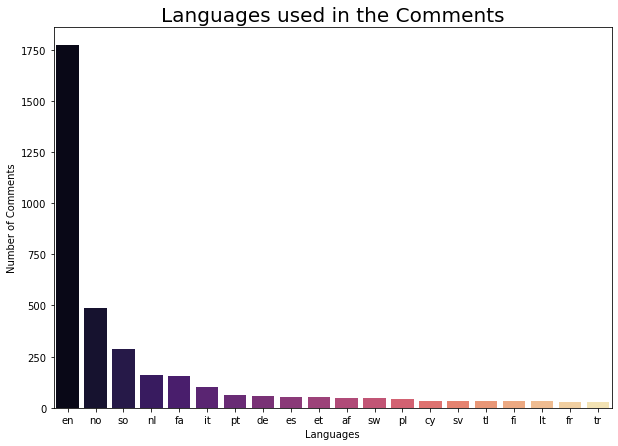

In [148]:
plt.figure(figsize=(10,7))
sns.barplot(comments_df['language'].value_counts()[:20].index,comments_df['language'].value_counts()[:20].values, palette='magma')
plt.title('Languages used in the Comments', fontsize=20)
plt.xlabel('Languages')
plt.ylabel('Number of Comments')
plt.show()

In [149]:
lang_keeping = ['en', 'no']

In [152]:
comments_df_2 = comments_df[comments_df.language==('en' or 'no')]
comments_df_2

,Comments,language
0,my mother died today and im so down..my sister...,en
2,Selling an extra #Teslacharger an connecter dm...,en
6,Ready for next Corona invasion - nice Tesla!,en
8,@notjonybones follow me,en
9,Incredible !! 👏❤️🔥,en
...,...,...
3770,Ok but who’s he talkin to?🤨,en
3771,Why not model 3?,en
3785,Very cool guys,en
3787,This 🔥🔥🔥,en


In [153]:
comments_df_2.to_csv('post_comments_english', encoding='utf-8')

In [154]:
post_comments_english = pd.read_csv('post_comments_english')

In [155]:
post_comments_english

,Unnamed: 0,Comments,language
0,0,my mother died today and im so down..my sister...,en
1,2,Selling an extra #Teslacharger an connecter dm...,en
2,6,Ready for next Corona invasion - nice Tesla!,en
3,8,@notjonybones follow me,en
4,9,Incredible !! 👏❤️🔥,en
...,...,...,...
1766,3770,Ok but who’s he talkin to?🤨,en
1767,3771,Why not model 3?,en
1768,3785,Very cool guys,en
1769,3787,This 🔥🔥🔥,en


In [156]:
text = 'Preprocess,ing s$#@!*o()&me,. random ##te$x$t t.o re*&m)ove chara#cter^s pun@tu*ation) and lowe#r cas-ing them.'

def preprocess(text):
    cleaned_text = ''
    punctuations = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''
    for i in text:
        if i not in punctuations:
            cleaned_text = cleaned_text + i
            
    return cleaned_text.lower()

preprocess(text)

'preprocessing some random text to remove characters puntuation and lower casing them'

In [157]:
post_comments_english['cleaned_punc'] = post_comments_english.Comments.apply(preprocess)
post_comments_english

,Unnamed: 0,Comments,language,cleaned_punc
0,0,my mother died today and im so down..my sister...,en,my mother died today and im so downmy sister h...
1,2,Selling an extra #Teslacharger an connecter dm...,en,selling an extra teslacharger an connecter dm ...
2,6,Ready for next Corona invasion - nice Tesla!,en,ready for next corona invasion nice tesla
3,8,@notjonybones follow me,en,notjonybones follow me
4,9,Incredible !! 👏❤️🔥,en,incredible 👏❤️🔥
...,...,...,...,...
1766,3770,Ok but who’s he talkin to?🤨,en,ok but who’s he talkin to🤨
1767,3771,Why not model 3?,en,why not model 3
1768,3785,Very cool guys,en,very cool guys
1769,3787,This 🔥🔥🔥,en,this 🔥🔥🔥


In [158]:
all_comments = ' '.join(comments for comments in post_comments_english.cleaned_punc)
all_comments

'my mother died today and im so downmy sister has a cancer my brother has a mental illness and me going 40 this year has a mental illness too iam a burden because i have nothing but this sicknessi just wish it end would fasti just wish with just a blink of the eye its all gonei cried watching her last video last year she was doing fine then she got a mentall illness too because she was force to take care of my brother who has serious mental illness and my sister has a cancerthe problem eatin her cos she has no work and money to support my brotherim so in the dark and blaming my self why im like this i should be the one helping them but i felt like i abondon themim nothing but a burden im nothing but a problem who come to this earth and have right to be borni would like say to mom im sorry for not there when you need the most and having this misearable life😭😭😭i wish it was only me who has given this biggest problem not you my familyma i love youim sorry for im being useless😭😭😭rest in pe

In [166]:
wordcloud_com = WordCloud(width = 800, height = 400, random_state=51, max_font_size=100, collocations=False).generate(all_comments)

(-0.5, 799.5, 399.5, -0.5)

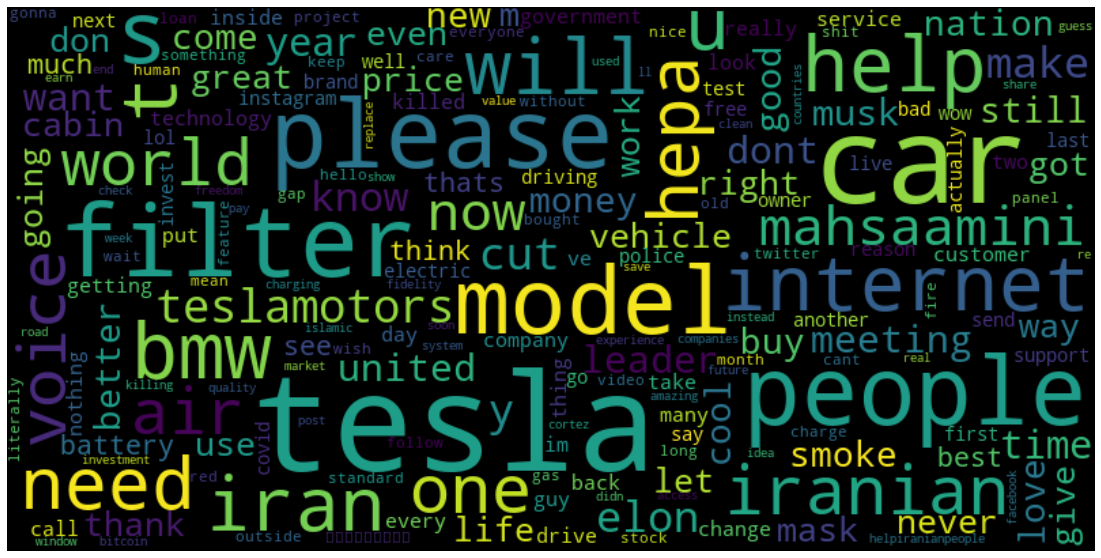

In [167]:
plt.figure(figsize=(20,10))
plt.imshow(wordcloud_com, interpolation='bilinear')
plt.axis('off')

### STOPWORDS 

In [169]:
def stopword(string):
    a = [i for i in string.split() if i not in stopwords.words('english')]
    return ' '.join(a)
stopword('Max is going out for a walk with the President of USA')

'Max going walk President USA'

### LEMMATIZATION 

In [170]:
from nltk import pos_tag
nltk.download('averaged_perceptron_tagger')
nltk.download('omw-1.4')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Purnanand\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Purnanand\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [171]:
lemmatizer = WordNetLemmatizer()

In [172]:
print("rocks :", lemmatizer.lemmatize("rocks"))

rocks : rock


We'll write a helper function to map NLTK position tags

In [173]:
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

#### 1st Get a POSITION TAG

In [176]:
testing_string = nltk.pos_tag(word_tokenize('my name is purnanand and i am flying an aeroplane'))
testing_string

[('my', 'PRP$'),
 ('name', 'NN'),
 ('is', 'VBZ'),
 ('purnanand', 'JJ'),
 ('and', 'CC'),
 ('i', 'JJ'),
 ('am', 'VBP'),
 ('flying', 'VBG'),
 ('an', 'DT'),
 ('aeroplane', 'NN')]

#### ENUMERATE THE ABOVE TAG

In [175]:
for i,j in enumerate(testing_string):
    print(i,j)

0 ('my', 'PRP$')
1 ('name', 'NN')
2 ('is', 'VBZ')
3 ('purnanand', 'JJ')
4 ('and', 'CC')
5 ('i', 'JJ')
6 ('am', 'VBP')
7 ('flying', 'VBG')
8 ('an', 'DT')
9 ('aeroplane', 'NN')


#### Defining LEMMATIZER Function

In [179]:
def lemmatizer_fn(string):
    word_pos_tags = nltk.pos_tag(word_tokenize(string))
    a = [ lemmatizer.lemmatize(tag[0], get_wordnet_pos(tag[1])) for idx, tag in enumerate(word_pos_tags)]
    
    return ' '.join(a)

lemmatizer_fn('my name is nothing and i am flying with a beautiful car')

'my name be nothing and i be fly with a beautiful car'

### Combining all functions 

In [180]:
def finalpreprocess(string):
    return lemmatizer_fn(stopword(string))

In [181]:
post_comments_english['cleaned_comm'] = post_comments_english['cleaned_punc'].apply(finalpreprocess)
post_comments_english

,Unnamed: 0,Comments,language,cleaned_punc,cleaned_comm
0,0,my mother died today and im so down..my sister...,en,my mother died today and im so downmy sister h...,mother die today im downmy sister cancer broth...
1,2,Selling an extra #Teslacharger an connecter dm...,en,selling an extra teslacharger an connecter dm ...,sell extra teslacharger connecter dm tesla cha...
2,6,Ready for next Corona invasion - nice Tesla!,en,ready for next corona invasion nice tesla,ready next corona invasion nice tesla
3,8,@notjonybones follow me,en,notjonybones follow me,notjonybones follow
4,9,Incredible !! 👏❤️🔥,en,incredible 👏❤️🔥,incredible 👏❤️🔥
...,...,...,...,...,...
1766,3770,Ok but who’s he talkin to?🤨,en,ok but who’s he talkin to🤨,ok who ’ s talkin to🤨
1767,3771,Why not model 3?,en,why not model 3,model 3
1768,3785,Very cool guys,en,very cool guys,cool guy
1769,3787,This 🔥🔥🔥,en,this 🔥🔥🔥,🔥🔥🔥


In [182]:
post_comments_english.cleaned_comm[0]

'mother die today im downmy sister cancer brother mental illness go 40 year mental illness iam burden nothing sicknessi wish end would fasti wish blink eye gonei cry watch last video last year fine get mentall illness force take care brother serious mental illness sister cancerthe problem eatin co work money support brotherim dark blame self im like one help felt like abondon themim nothing burden im nothing problem come earth right borni would like say mom im sorry need misearable life😭😭😭i wish give big problem familyma love youim sorry im useless😭😭😭rest peace'

In [183]:
post_comments_english.Comments[0]

'my mother died today and im so down..my sister has a cancer my brother has a mental illness and me going 40 this year has a mental illness too iam a burden because i have nothing but this sickness..i just wish it end would fast,i just wish with just a blink of the eye its all gone..i cried watching her last video last year she was doing fine then she got a mentall illness too because she was force to take care of my brother who has serious mental illness and my sister has a cancer..the problem eatin her cos she has no work and money to support my brother..im so in the dark and blaming my self why im like this i should be the one helping them but i felt like i abondon them...im nothing but a burden im nothing but a problem who come to this earth and have right to be born..i would like say to mom im sorry for not there when you need the most and having this misearable life😭😭😭i wish it was only me who has given this biggest problem not you my family..ma i love you..im sorry for im being 

### TOKENIZATION 

In [186]:
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize 
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

#### Sentence tokenizer 

In [188]:
sentence = "Hi, My name is Aman, I hope you like my work. You can follow me on Instagram for more resources. My username is 'the.clever.programmer'."
print(sent_tokenize(sentence))

['Hi, My name is Aman, I hope you like my work.', 'You can follow me on Instagram for more resources.', "My username is 'the.clever.programmer'."]


#### WORD Tokenizer 

In [192]:
sentence = "Hi, My name is Aman, I hope you like my work. You can follow me on Instagram for more resources. My username is 'the.clever.programmer'."
print(word_tokenize(sentence))

['Hi', ',', 'My', 'name', 'is', 'Aman', ',', 'I', 'hope', 'you', 'like', 'my', 'work', '.', 'You', 'can', 'follow', 'me', 'on', 'Instagram', 'for', 'more', 'resources', '.', 'My', 'username', 'is', "'the.clever.programmer", "'", '.']


In [198]:
b1 = word_tokenize(sentence)
','.join(b1)

"Hi,,,My,name,is,Aman,,,I,hope,you,like,my,work,.,You,can,follow,me,on,Instagram,for,more,resources,.,My,username,is,'the.clever.programmer,',."

In [199]:
def tokenization_fn(string):
    b = word_tokenize(string)
    return ','.join(b)

In [200]:
post_comments_english['tokenized_comm'] = post_comments_english['cleaned_comm'].apply(tokenization_fn)

In [201]:
post_comments_english

,Unnamed: 0,Comments,language,cleaned_punc,cleaned_comm,tokenized_comm
0,0,my mother died today and im so down..my sister...,en,my mother died today and im so downmy sister h...,mother die today im downmy sister cancer broth...,"mother,die,today,im,downmy,sister,cancer,broth..."
1,2,Selling an extra #Teslacharger an connecter dm...,en,selling an extra teslacharger an connecter dm ...,sell extra teslacharger connecter dm tesla cha...,"sell,extra,teslacharger,connecter,dm,tesla,cha..."
2,6,Ready for next Corona invasion - nice Tesla!,en,ready for next corona invasion nice tesla,ready next corona invasion nice tesla,"ready,next,corona,invasion,nice,tesla"
3,8,@notjonybones follow me,en,notjonybones follow me,notjonybones follow,"notjonybones,follow"
4,9,Incredible !! 👏❤️🔥,en,incredible 👏❤️🔥,incredible 👏❤️🔥,"incredible,👏❤️🔥"
...,...,...,...,...,...,...
1766,3770,Ok but who’s he talkin to?🤨,en,ok but who’s he talkin to🤨,ok who ’ s talkin to🤨,"ok,who,’,s,talkin,to🤨"
1767,3771,Why not model 3?,en,why not model 3,model 3,"model,3"
1768,3785,Very cool guys,en,very cool guys,cool guy,"cool,guy"
1769,3787,This 🔥🔥🔥,en,this 🔥🔥🔥,🔥🔥🔥,🔥🔥🔥


In [204]:
def comment_len(comment):
    return len(comment)

In [205]:
post_comments_english['comm_length'] = post_comments_english.tokenized_comm.apply(comment_len)
post_comments_english

,Unnamed: 0,Comments,language,cleaned_punc,cleaned_comm,tokenized_comm,comm_length
0,0,my mother died today and im so down..my sister...,en,my mother died today and im so downmy sister h...,mother die today im downmy sister cancer broth...,"mother,die,today,im,downmy,sister,cancer,broth...",566
1,2,Selling an extra #Teslacharger an connecter dm...,en,selling an extra teslacharger an connecter dm ...,sell extra teslacharger connecter dm tesla cha...,"sell,extra,teslacharger,connecter,dm,tesla,cha...",59
2,6,Ready for next Corona invasion - nice Tesla!,en,ready for next corona invasion nice tesla,ready next corona invasion nice tesla,"ready,next,corona,invasion,nice,tesla",37
3,8,@notjonybones follow me,en,notjonybones follow me,notjonybones follow,"notjonybones,follow",19
4,9,Incredible !! 👏❤️🔥,en,incredible 👏❤️🔥,incredible 👏❤️🔥,"incredible,👏❤️🔥",15
...,...,...,...,...,...,...,...
1766,3770,Ok but who’s he talkin to?🤨,en,ok but who’s he talkin to🤨,ok who ’ s talkin to🤨,"ok,who,’,s,talkin,to🤨",21
1767,3771,Why not model 3?,en,why not model 3,model 3,"model,3",7
1768,3785,Very cool guys,en,very cool guys,cool guy,"cool,guy",8
1769,3787,This 🔥🔥🔥,en,this 🔥🔥🔥,🔥🔥🔥,🔥🔥🔥,3


In [206]:
final_df = post_comments_english[['Comments','language','comm_length','tokenized_comm']]

In [207]:
final_df

,Comments,language,comm_length,tokenized_comm
0,my mother died today and im so down..my sister...,en,566,"mother,die,today,im,downmy,sister,cancer,broth..."
1,Selling an extra #Teslacharger an connecter dm...,en,59,"sell,extra,teslacharger,connecter,dm,tesla,cha..."
2,Ready for next Corona invasion - nice Tesla!,en,37,"ready,next,corona,invasion,nice,tesla"
3,@notjonybones follow me,en,19,"notjonybones,follow"
4,Incredible !! 👏❤️🔥,en,15,"incredible,👏❤️🔥"
...,...,...,...,...
1766,Ok but who’s he talkin to?🤨,en,21,"ok,who,’,s,talkin,to🤨"
1767,Why not model 3?,en,7,"model,3"
1768,Very cool guys,en,8,"cool,guy"
1769,This 🔥🔥🔥,en,3,🔥🔥🔥


---------------------------------------------------------

## SENTIMENTS
If the comment is a positive, negative or neutral tweet.

In [208]:
vader = SentimentIntensityAnalyzer()

In [229]:
vader.polarity_scores('Very Very Good beautiful 😍🙌')['compound']

0.9038

In [230]:
def vader_compound_score(string):
    if vader.polarity_scores(string)['compound'] >= 0.05 :
        return 'Positive'
    elif vader.polarity_scores(string)['compound'] <= -0.05:
        return 'Negative'
    else :
        return 'Neutral'

In [231]:
final_df['Vader_Senti'] = final_df['tokenized_comm'].apply(vader_compound_score)

In [232]:
final_df

,Comments,language,comm_length,tokenized_comm,Vader_Senti
0,my mother died today and im so down..my sister...,en,566,"mother,die,today,im,downmy,sister,cancer,broth...",Negative
1,Selling an extra #Teslacharger an connecter dm...,en,59,"sell,extra,teslacharger,connecter,dm,tesla,cha...",Neutral
2,Ready for next Corona invasion - nice Tesla!,en,37,"ready,next,corona,invasion,nice,tesla",Neutral
3,@notjonybones follow me,en,19,"notjonybones,follow",Neutral
4,Incredible !! 👏❤️🔥,en,15,"incredible,👏❤️🔥",Negative
...,...,...,...,...,...
1766,Ok but who’s he talkin to?🤨,en,21,"ok,who,’,s,talkin,to🤨",Neutral
1767,Why not model 3?,en,7,"model,3",Neutral
1768,Very cool guys,en,8,"cool,guy",Neutral
1769,This 🔥🔥🔥,en,3,🔥🔥🔥,Negative


In [233]:
final_df.Vader_Senti.value_counts()

Neutral     1524
Positive     164
Negative      83
Name: Vader_Senti, dtype: int64

In [234]:
vader_pie_comm = [len(final_df[final_df['Vader_Senti']=='Positive']),
                len(final_df[final_df['Vader_Senti']=='Negative']),
                len(final_df[final_df['Vader_Senti']=='Neutral'])]

labels=['Positive','Negative', 'Neutral']
colors=['aquamarine', 'darkslategray', 'skyblue']

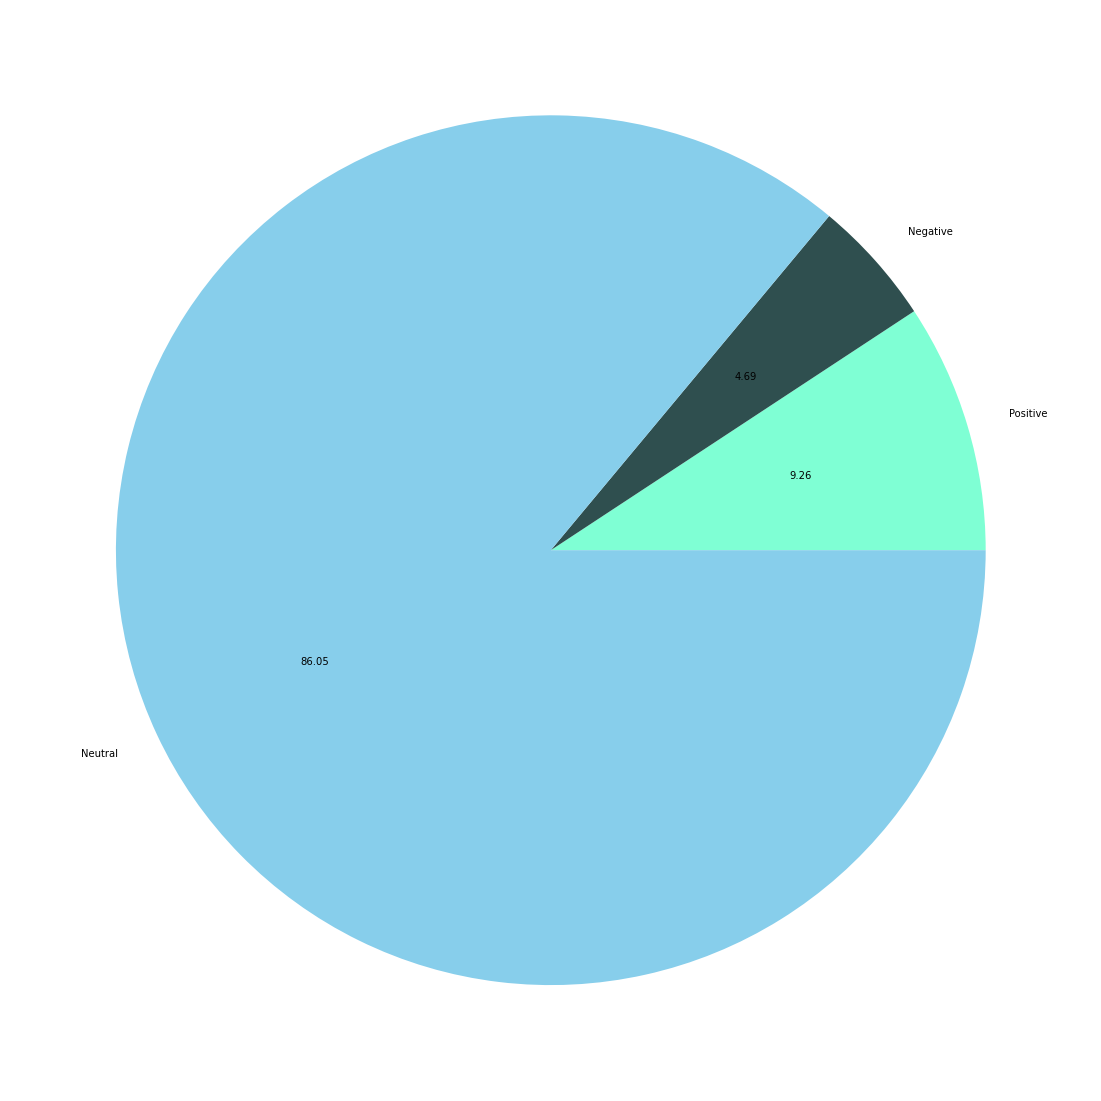

In [235]:
plt.figure(figsize=(20,20))
plt.pie(vader_pie_comm, labels=labels, colors=colors, autopct = '%.2f')
plt.show()

## POPULARITY SCORE 

Popularity Score = [(No. of Positive Tweets) - (No. of Negative Tweets)]  / Total No. of Tweets  *  100

In [237]:
Score = final_df.Vader_Senti.value_counts()
Score

Neutral     1524
Positive     164
Negative      83
Name: Vader_Senti, dtype: int64

In [260]:
Senitment_score1 = ((Score.values[1]-Score.values[2])/(Score.values[0]+Score.values[1]+Score.values[2])) * 100
Senitment_score1

4.573687182382835

##  Sentiment Score is 4.57

Let's consider adding 1/10th of Neutral Comments, assuming atleast 10% of the Neutral comments comments are positive 

In [261]:
Senitment_score2 = ((Score.values[1]-Score.values[2]+(Score.values[0]/10))/(Score.values[0]+Score.values[1]+Score.values[2])) * 100
Senitment_score2

13.178994918125353

##  Sentiment Score is 13.17899

In [262]:
Senitment_score3 = (Score.values[1]/Score.values[2])+1
Senitment_score3

2.975903614457831

In [257]:
polarity = [round(vader.polarity_scores(i)['compound'], 2) for i in final_df['Comments']]
final_df['sentiment_score'] = polarity

In [258]:
final_df

,Comments,language,comm_length,tokenized_comm,Vader_Senti,sentiment_score
0,my mother died today and im so down..my sister...,en,566,"mother,die,today,im,downmy,sister,cancer,broth...",Negative,-0.92
1,Selling an extra #Teslacharger an connecter dm...,en,59,"sell,extra,teslacharger,connecter,dm,tesla,cha...",Neutral,0.27
2,Ready for next Corona invasion - nice Tesla!,en,37,"ready,next,corona,invasion,nice,tesla",Neutral,0.68
3,@notjonybones follow me,en,19,"notjonybones,follow",Neutral,0.00
4,Incredible !! 👏❤️🔥,en,15,"incredible,👏❤️🔥",Negative,-0.46
...,...,...,...,...,...,...
1766,Ok but who’s he talkin to?🤨,en,21,"ok,who,’,s,talkin,to🤨",Neutral,0.15
1767,Why not model 3?,en,7,"model,3",Neutral,0.00
1768,Very cool guys,en,8,"cool,guy",Neutral,0.38
1769,This 🔥🔥🔥,en,3,🔥🔥🔥,Negative,-0.74


In [268]:
Senitment_score4 = final_df.sentiment_score.mean()
Senitment_score4

0.12823828345567462

### MOST POSITIVE COMMENTS

In [277]:
final_df[final_df['sentiment_score'] >= 0.90]

,Comments,language,comm_length,tokenized_comm,Vader_Senti,sentiment_score
5,"Yeah, Tesla is really great. For example you p...",en,284,"yeah,tesla,really,great,example,pay,15k,usd,fs...",Positive,0.96
22,I do not understand people that criticize #FSD...,en,166,"understand,people,criticize,fsd…,car,ability,d...",Neutral,0.92
30,I have a great idea to meet and get to know ea...,en,246,"great,idea,meet,get,know,american,embassy,safe...",Neutral,0.93
40,And who will marry me?! I have no money! I hat...,en,180,"marry,money,hate,money,hate,business,love,art,...",Neutral,0.98
59,The new charging technology increases the batt...,en,168,"new,charge,technology,increase,battery,capacit...",Neutral,0.90
62,Say congrats to me I got myself a new @teslamo...,en,106,"say,congrats,get,new,teslamotors,car,mentor,ke...",Positive,0.95
77,Got a model y in October (2022 model) for like...,en,252,"get,model,october,2022,model,like,80k,cad,pre,...",Neutral,0.97
79,Henry Ford literally invented this same move a...,en,102,"henry,ford,literally,invent,move,successful,ob...",Neutral,0.93
163,Dear Tesla Communication Team\nI sent an e-mai...,en,159,"dear,tesla,communication,team,send,email,estee...",Neutral,0.96
217,"aaaa my dream car, I hope Tesla will be more s...",en,49,"aaaa,dream,car,hope,tesla,successful,time,time❤️💕",Positive,0.92


### From all the Scores we can analyse that the given Post has a positive feedback. 

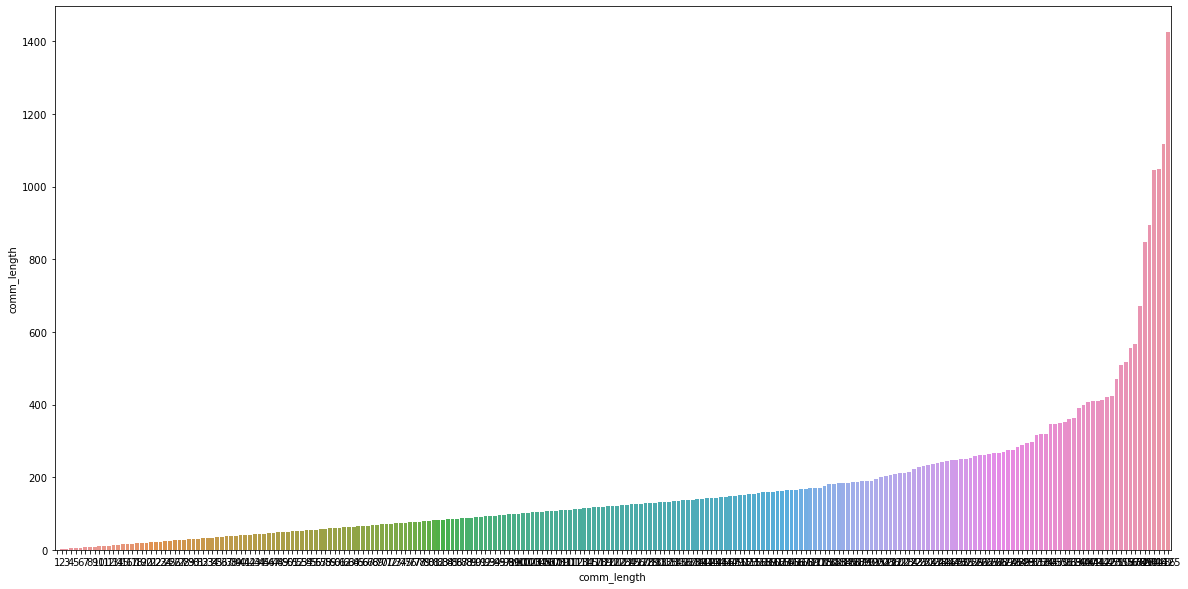

In [284]:
plt.figure(figsize=(20,10))
sns.barplot(final_df['comm_length'],final_df['comm_length'])
plt.show()

In [291]:
final_df.comm_length.max()

1425

In [302]:
final_df[final_df.comm_length >= 100]

,Comments,language,comm_length,tokenized_comm,Vader_Senti,sentiment_score
0,my mother died today and im so down..my sister...,en,566,"mother,die,today,im,downmy,sister,cancer,broth...",Negative,-0.92
5,"Yeah, Tesla is really great. For example you p...",en,284,"yeah,tesla,really,great,example,pay,15k,usd,fs...",Positive,0.96
9,Because the owners of this country don't want ...,en,409,"owner,country,dont,want,im,talk,real,owner,rea...",Neutral,0.88
14,Tesla is announcing a new micro loan scheme. A...,en,894,"tesla,announce,new,micro,loan,scheme,simple,qu...",Neutral,0.74
17,"The new technology, charging by creating an in...",en,155,"new,technology,charge,create,internal,force,ba...",Neutral,0.08
...,...,...,...,...,...,...
1641,"Bravo! Noted if I need to buy a car 🚘 Now, I d...",en,129,"bravo,note,need,buy,car,🚘,don,’,t,need,one,suf...",Neutral,0.00
1674,"I realize, when Ilon or just humans say, what ...",en,122,"realize,ilon,human,say,really,mean,tesla,fast,...",Neutral,-0.42
1712,Need to improve build quality and faster servi...,en,227,"need,improve,build,quality,faster,service,cent...",Neutral,0.70
1750,We couldn`t have done it without your expert s...,en,111,"couldn,`,t,do,without,expert,servicesl,appreci...",Neutral,0.60


---

The conclusion is that the given post is performing positively.